In [39]:
import pandas as pd
import seaborn as sns

In [40]:
#loading the data
fake=pd.read_csv('C:\\Users\\Acer\\OneDrive\\Documents\\projects\\news_credibility_analyzer\\data\\Fake.csv')
real=pd.read_csv('C:\\Users\\Acer\\OneDrive\\Documents\\projects\\news_credibility_analyzer\\data\\True.csv')

In [41]:
fake.head()
#adding the labels to each of the datasets
fake['label']=0
real['label']=1

In [42]:
#combining the data
df=pd.concat([fake,real])
df.sample(3)

title  \
19837  Aid officials 'gravely concerned' over fate of...   
5447    Trump Continues To Solicit Illegal Donations ...   
7462    Leaked Audio: CEO Of CBS Gleefully Celebrates...   

                                                    text    subject  \
19837  ERBIL, Iraq (Reuters) - Aid officials in Iraq ...  worldnews   
5447   Foreign nationals, including lawmakers and oth...       News   
7462   Leslie Moonves, the CEO of CBS, one of the thr...       News   

                      date  label  
19837  September 17, 2017       1  
5447         July 17, 2016      0  
7462        March 16, 2016      0

In [43]:
#checking for the null data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


There are no null data

In [44]:
df.isnull().sum()#no null data

title      0
text       0
subject    0
date       0
label      0
dtype: int64

**NLTK package for tokenizing articles**
____________________________________
Step 1: Import the dataset.\
 Step 2:  Import  the  English  stop  words  and add update the stop words to it.\
Step  3:  Separate  each  article  into  tokens  (removes whitespaces).\
Step 4: Convert all words to lowercase.\
Step 5: Remove the punctuation and stop words. \
Step 6: Remove the numbers. \
Step 7: Convert to lemmatized words (root form) \
Step 8: Create the n-grams. \
Step 9: Stop.
___________________________________________
**TF-IDF(Term Frequency- Inverse Document Frequency)**
___________________________________________________
- It is a well known method for grading the data/words in a machine learning mechanism, especially with textual data.
- It is a scoring mechanism to measure the frequency of occurence of a particular word in a document.
- $TF('aju')=\frac{\text{No of Times term 'aju' appeared in document}}{\text{Length of Document}}$
- Inverse data frequency is a process to measure how the occured word is termed as rare or common in the document which is called as Corpus.
- $IDF('aju')=log_e(\frac{\text{No of documents in Corpes}}{\text{No of documents with term 'aju' in it}})$
- $TF-IDF('aju')=TF('aju')*IDF('aju')$
- for high TF, word is considered highly pertinet and given high value and low frequency of occurence.

In [45]:
#find the dupklicates in the data
num_duplicates = df.duplicated().sum()
print("The number of the duplicates in the data are:",num_duplicates)

The number of the duplicates in the data are: 209


In [46]:
#dropping the duplicats
df.drop_duplicates(inplace=True)
num_duplicates=df.duplicated().sum()
num_duplicates

np.int64(0)

Total duplicate texts: 10990
Duplicate texts with different labels: 627


C:\Users\Acer\AppData\Local\Temp\ipykernel_21520\3650224679.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values, palette='Set2')


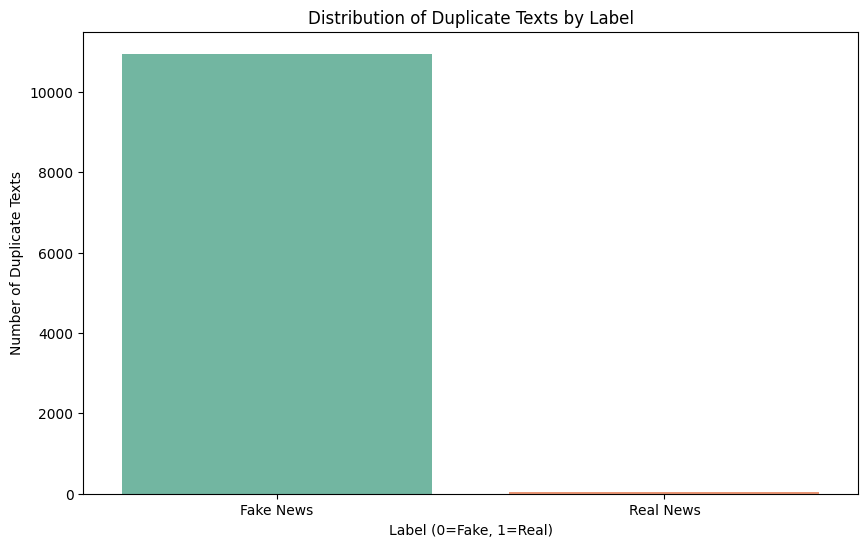


Duplicate texts with different labels:
      text  label   subject
10923           0  politics
11041           0  politics
11190           0  politics
11225           0  politics
11236           0  politics
11241           0  politics
11247           0  politics
11249           0  politics
11267           0  politics
11268           0  politics


In [47]:
# analyzing the duplicates in the text with different labels
import numpy as np
import matplotlib.pyplot as plt


# Find duplicate texts
duplicates_text = df[df.duplicated(subset=['text'], keep=False)]

# Check duplicates with different labels
duplicates_diff_labels = duplicates_text[duplicates_text.groupby('text')['label'].transform('nunique') > 1]

print(f"Total duplicate texts: {len(duplicates_text)}")
print(f"Duplicate texts with different labels: {len(duplicates_diff_labels)}")

# Count duplicates by label
duplicate_counts = duplicates_text['label'].value_counts()

# Plot the duplicates
plt.figure(figsize=(10, 6))
sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values, palette='Set2')
plt.xlabel('Label (0=Fake, 1=Real)')
plt.ylabel('Number of Duplicate Texts')
plt.title('Distribution of Duplicate Texts by Label')
plt.xticks([0, 1], ['Fake News', 'Real News'])
plt.savefig('../images/duplicate_texts_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

# Show examples of duplicates with different labels
print("\nDuplicate texts with different labels:")
print(duplicates_diff_labels[['text', 'label', 'subject']].head(10))

In [48]:
# Drop duplicate texts, keep first occurrence
df = df.drop_duplicates(subset=['text'], keep='first')

# Remove conflicting duplicates
duplicates = df[df.duplicated(subset=['text'], keep=False)].copy()
conflicting = duplicates[duplicates.groupby('text')['label'].transform('nunique') > 1]
df = df[~df.index.isin(conflicting.index)]

print(f"Total rows: {len(df)}")
print(df['label'].value_counts())

Total rows: 38646
label
1    21191
0    17455
Name: count, dtype: int64


In [49]:
df['label'].value_counts()

label
1    21191
0    17455
Name: count, dtype: int64

### **ANALYZING CLASS IMBALANCE**

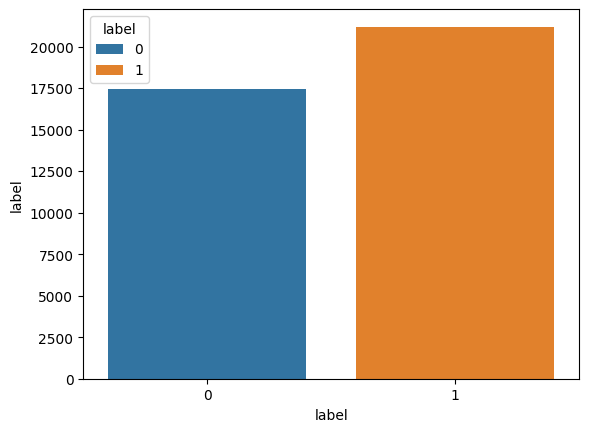

In [50]:
#checking the imbalance of the datasets
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs('../images', exist_ok=True)


sns.barplot(data=df,x='label',y='label',width=0.8,estimator=len,hue='label')
plt.savefig('../images/class_balance_distribution.png', bbox_inches='tight', dpi=300)

### **ANALYZING THE DISTRIBUTION OF FAKE NEWS BY CATEGORY**

In [51]:
'''from above we can conclude that there is no imbalance of the dataset'''
#various news categories
df['subject'].value_counts()

subject
politicsNews       11213
worldnews           9978
News                9050
politics            6425
US_News              783
left-news            683
Government News      514
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_21520\1224798496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')


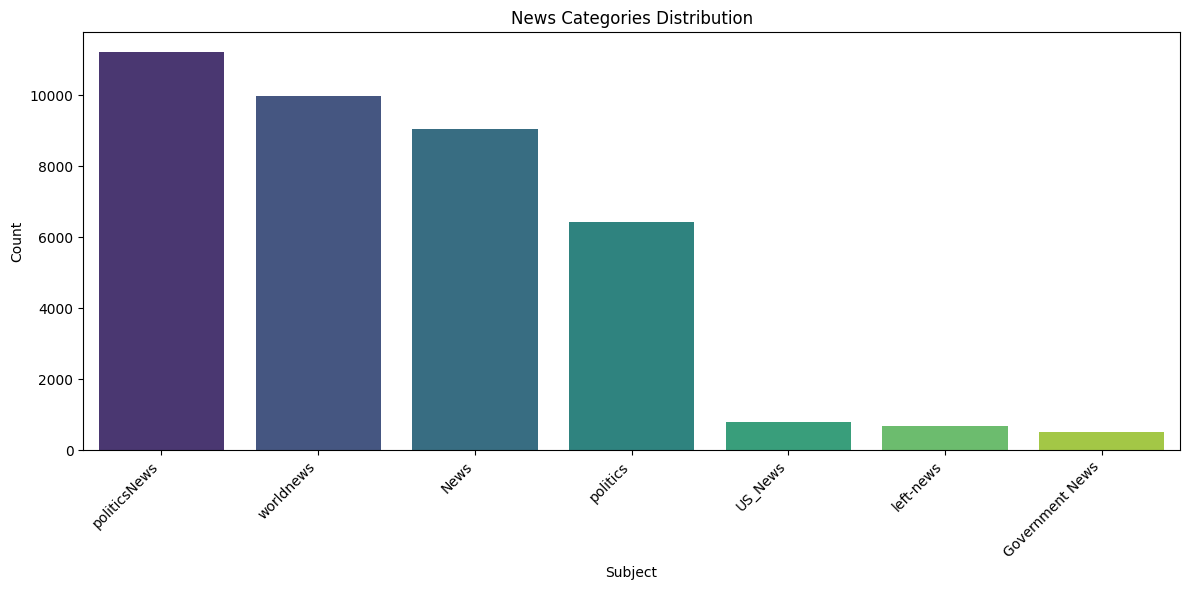

In [52]:
'''from above we can conclude that there is no imbalance of the dataset'''
#various news categories
subject_counts = df['subject'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('News Categories Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../images/news_categories_all.png', bbox_inches='tight', dpi=300)
plt.show()

In [53]:
subject_counts = df[df['label']==0]['subject'].value_counts()
subject_counts

subject
News               9050
politics           6425
US_News             783
left-news           683
Government News     514
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_21520\1388944331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')


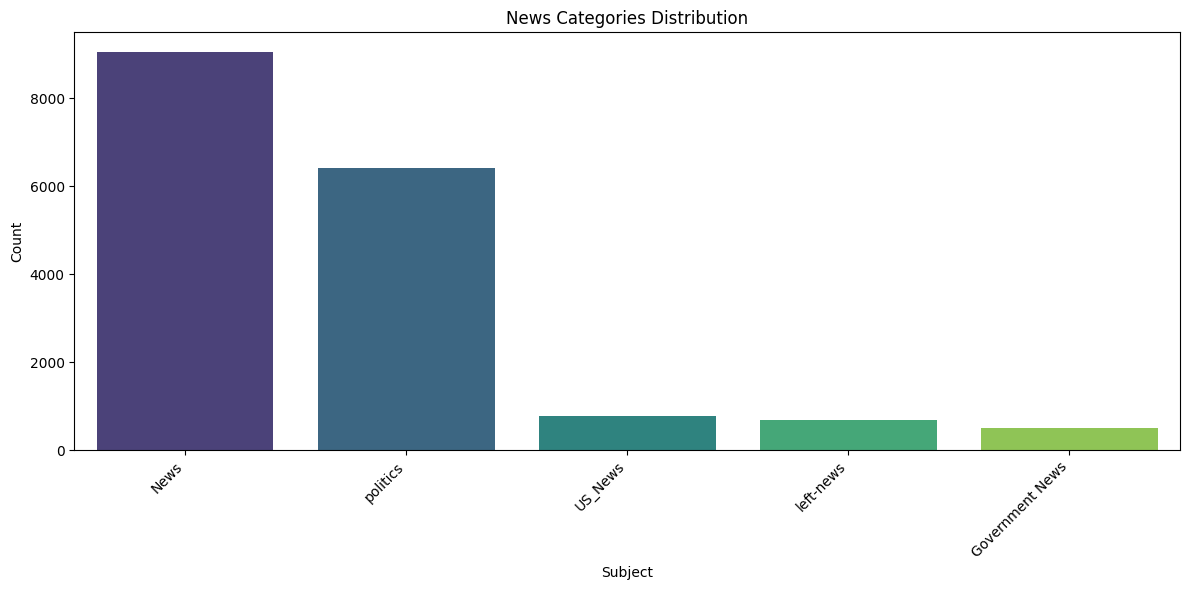

In [54]:
#various news categories among the fake newz
subject_counts = df[df['label']==0]['subject'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('News Categories Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../images/news_categories_fake_only.png', bbox_inches='tight', dpi=300)
plt.show()

In [55]:
'''we have got politicsnews and news 
lets see if they are same'''
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(df[df['subject']=='politicsNews'])
print("-------------------------------------------------")
print(df[df['subject']=='politics'])


                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
5      White House, Congress prepare for talks on spe...   
6      Trump says Russia probe will be fair, but time...   
7      Factbox: Trump on Twitter (Dec 29) - Approval ...   
8             Trump on Twitter (Dec 28) - Global Warming   
9      Alabama official to certify Senator-elect Jone...   
10     Jones certified U.S. Senate winner despite Moo...   
11     New York governor questions the constitutional...   
12     Factbox: Trump on Twitter (Dec 28) - Vanity Fa...   
13        Trump on Twitter (Dec 27) - Trump, Iraq, Syria   
14     Man says he delivered manure to Mnuchin to pro...   
15     Virginia officials postpone lotte

In [56]:
# Replace 'politicsNews' with 'politics' in the subject column
df['subject'] = df['subject'].replace({'politicsNews': 'politics'})

# Verify the replacement
print(df['subject'].value_counts())

subject
politics           17638
worldnews           9978
News                9050
US_News              783
left-news            683
Government News      514
Name: count, dtype: int64


### **FORMATTING THE DATE**

In [57]:
# Format dates - handle all three date formats
df['date'] = df['date'].astype(str).str.strip()
df['date_parsed'] = pd.to_datetime(df['date'], format='%B %d, %Y', errors='coerce')
nat_mask = df['date_parsed'].isna()
df.loc[nat_mask, 'date_parsed'] = pd.to_datetime(df.loc[nat_mask, 'date'], format='%d-%b-%y', errors='coerce')
nat_mask = df['date_parsed'].isna()
df.loc[nat_mask, 'date_parsed'] = pd.to_datetime(df.loc[nat_mask, 'date'], format='%b %d, %Y', errors='coerce')
df['date'] = df['date_parsed']
df.drop('date_parsed', axis=1, inplace=True)
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.day_name()

In [58]:
df['date'].isna().sum()

np.int64(6)

In [59]:
df['date']

0       2017-12-31
1       2017-12-31
2       2017-12-30
3       2017-12-29
4       2017-12-25
5       2017-12-25
6       2017-12-23
7       2017-12-23
8       2017-12-22
9       2017-12-21
10      2017-12-21
11      2017-12-21
12      2017-12-21
13      2017-12-20
14      2017-12-20
15      2017-12-20
16      2017-12-19
17      2017-12-17
18      2017-12-17
19      2017-12-16
20      2017-12-16
21      2017-12-13
22      2017-12-12
23      2017-12-12
24      2017-12-12
25      2017-12-12
26      2017-12-11
27      2017-12-10
28      2017-12-09
29      2017-12-07
30      2017-12-07
31      2017-12-07
32      2017-12-06
33      2017-12-06
34      2017-12-06
35      2017-12-05
36      2017-12-05
37      2017-12-05
38      2017-12-05
39      2017-12-04
40      2017-12-03
41      2017-12-03
42      2017-12-02
43      2017-12-02
44      2017-12-01
45      2017-12-01
46      2017-12-01
47      2017-12-01
48      2017-11-30
49      2017-11-30
50      2017-11-30
51      2017-11-29
52      2017

In [60]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  \
0  Donald Trump just couldn t wish all Americans ...    News 2017-12-31   
1  House Intelligence Committee Chairman Devin Nu...    News 2017-12-31   
2  On Friday, it was revealed that former Milwauk...    News 2017-12-30   
3  On Christmas day, Donald Trump announced that ...    News 2017-12-29   
4  Pope Francis used his annual Christmas Day mes...    News 2017-12-25   

   label    year  month   day dayofweek  
0      0  2017.0   12.0  31.0    Sunday  
1      0  2017.0   12.0  31.0    Sunday  
2      0  2017.0   12.0  30.0  Saturday  
3      0  2017.0   12.0  29.0    Friday  
4      0  2017.0   12.0  25.0    Monday

### **ANALYZING THE IMPACT OF THE DAY**

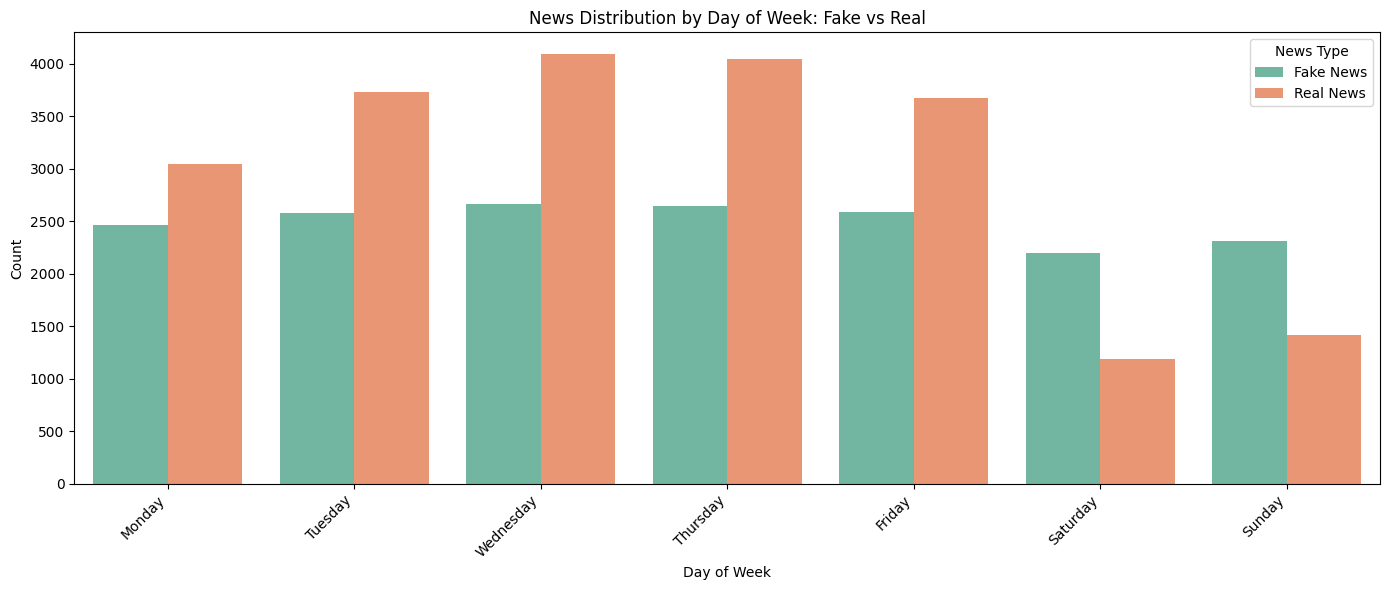

In [61]:
'''let's find the pattern of news by day of the week'''
# Create side-by-side comparison of fake vs real news by day of week
plt.figure(figsize=(14, 6))

# Reset index to avoid duplicate index error
df_plot = df.reset_index(drop=True).copy()
df_plot['label_text'] = df_plot['label'].map({0: 'Fake News', 1: 'Real News'})

# Order days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.countplot(data=df_plot, x='dayofweek', hue='label_text', palette='Set2', order=day_order)
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('News Distribution by Day of Week: Fake vs Real')
plt.xticks(rotation=45, ha='right')
plt.legend(title='News Type')
plt.tight_layout()
plt.savefig('../images/news_by_day_of_week.png', bbox_inches='tight', dpi=300)
plt.show()

**Summary from Fake news distribution by day of the week**
- There seems to be no pattern by the day of the week in the fake news like the weekend should have drawn more fake news
- There seem sto be higher fake news in the saturday 

### **ANALYZING THE FAKE NEWS BY TEXT LENGTH OF THE NEWS TITLE AND NEWS**

In [62]:
df['text_length']=df['text'].apply(len)#FINDING THE LENGTH OF THE TEXT AND TITLE
df['title_length']=df['title'].apply(len)
df[['text_length','title_length']].head()


text_length  title_length
0         2893            79
1         1898            69
2         3597            90
3         2774            78
4         2346            70

In [63]:
df['label'].unique()

array([0, 1])

In [64]:
def plot_distribution(column, title, xlabel, filename):
    plt.figure(figsize=(10, 6))
    # Create copy with text labels to ensure correct legend
    df_plot = df.copy()
    df_plot['label_text'] = df_plot['label'].map({0: 'Fake News', 1: 'Real News'})
    
    sns.histplot(data=df_plot, x=column, hue='label_text', bins=100, kde=True, palette='Set2', alpha=0.6)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.legend(title='News Type',labels=['real','fake'])
    plt.savefig(f'../images/{filename}.png', bbox_inches='tight', dpi=300)
    plt.show()

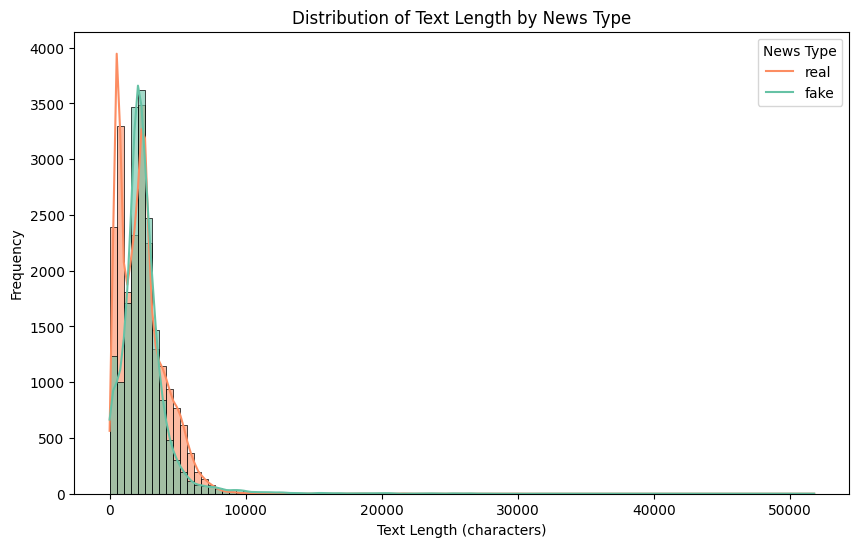

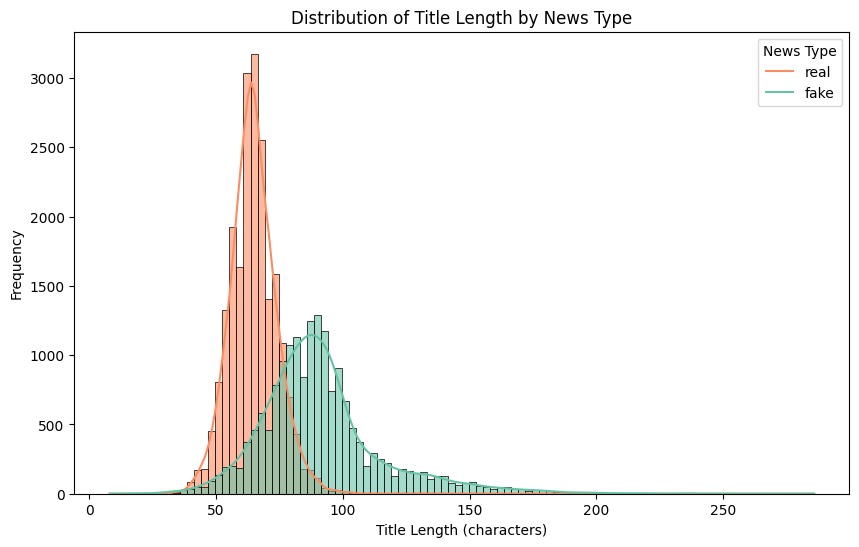

In [65]:
plot_distribution('text_length', 'Distribution of Text Length by News Type', 'Text Length (characters)', 'text_length_distribution')    
plot_distribution('title_length', 'Distribution of Title Length by News Type', 'Title Length (characters)', 'title_length_distribution')    

In [66]:
print(df.groupby('label')['title_length'].describe())

         count       mean        std   min   25%   50%    75%    max
label                                                               
0      17455.0  91.215812  24.516454   8.0  77.0  88.0  100.0  286.0
1      21191.0  64.660233   9.159722  26.0  59.0  64.0   70.0  133.0


**summary**
- Fake news has the longer title length than real news
- The text length does not seem to have the larger impact in the news length

### **ANALYZING THE EFFECT OF THE PUNTUATION MARKS AND THE UPPER CASE LETTERS**

In [67]:
df['punctuation_count']=df['text'].str.count(r'\?')
df[['text','punctuation_count']].head()

text  punctuation_count
0  Donald Trump just couldn t wish all Americans ...                  9
1  House Intelligence Committee Chairman Devin Nu...                  0
2  On Friday, it was revealed that former Milwauk...                  4
3  On Christmas day, Donald Trump announced that ...                  1
4  Pope Francis used his annual Christmas Day mes...                  0

In [68]:
def plot_punctuation_distribution():
    plt.figure(figsize=(10, 6))
    # Create copy with text labels to ensure correct legend
    df_plot = df.copy()
    df_plot['label_text'] = df_plot['label'].map({0: 'Fake News', 1: 'Real News'})
    
    sns.boxplot(data=df_plot, x='punctuation_count', y='label_text', palette='Set2')    
    plt.title('Distribution of Punctuation Count by News Type')
    plt.legend(title='News Type',labels=['real','fake'])
    plt.savefig('../images/punctuation_count_distribution.png', bbox_inches='tight', dpi=300)
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_21520\3735212586.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='punctuation_count', y='label_text', palette='Set2')


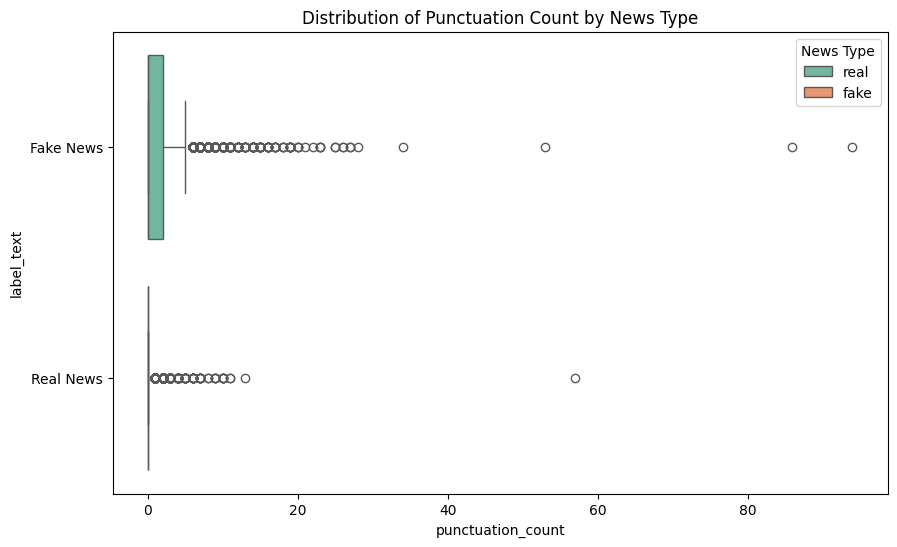

In [69]:
plot_punctuation_distribution()

In [70]:
df['upper_case_count']=df['text'].str.count(r'[A-Z]')
df[['text','upper_case_count']].head()

text  upper_case_count
0  Donald Trump just couldn t wish all Americans ...               138
1  House Intelligence Committee Chairman Devin Nu...                88
2  On Friday, it was revealed that former Milwauk...               308
3  On Christmas day, Donald Trump announced that ...               123
4  Pope Francis used his annual Christmas Day mes...                63

C:\Users\Acer\AppData\Local\Temp\ipykernel_21520\2350341790.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x='upper_case_count', y='label_text', palette='Set2')


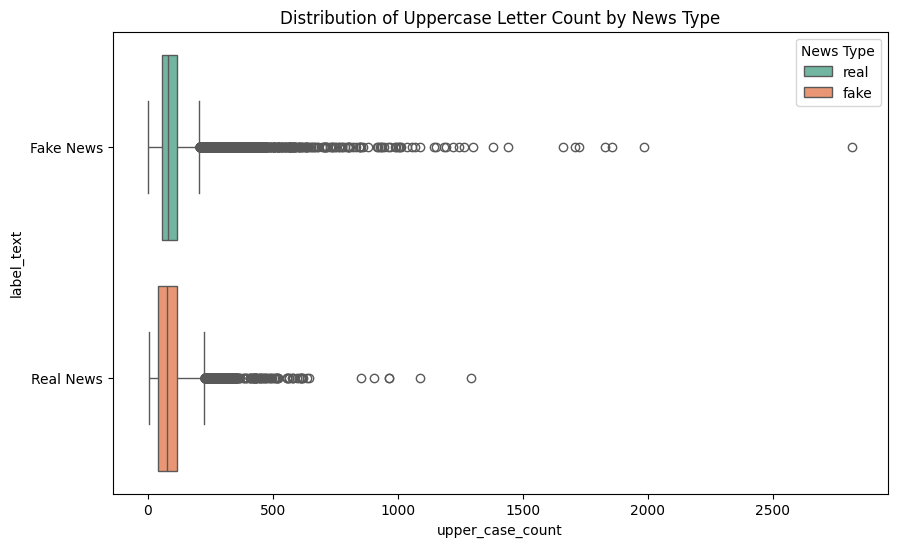

In [71]:
plt.figure(figsize=(10, 6))
# Create copy with text labels to ensure correct legend
df_plot = df.copy()
df_plot['label_text'] = df_plot['label'].map({0: 'Fake News', 1: 'Real News'})
sns.boxplot(data=df_plot, x='upper_case_count', y='label_text', palette='Set2')
plt.title('Distribution of Uppercase Letter Count by News Type')
plt.legend(title='News Type',labels=['real','fake'])
plt.savefig('../images/uppercase_letter_distribution.png', bbox_inches='tight', dpi=300)
plt.show()


**summary**:
- The use of question marks is more dominant in the fake news.
- The upper case letters are more used in the fake news.

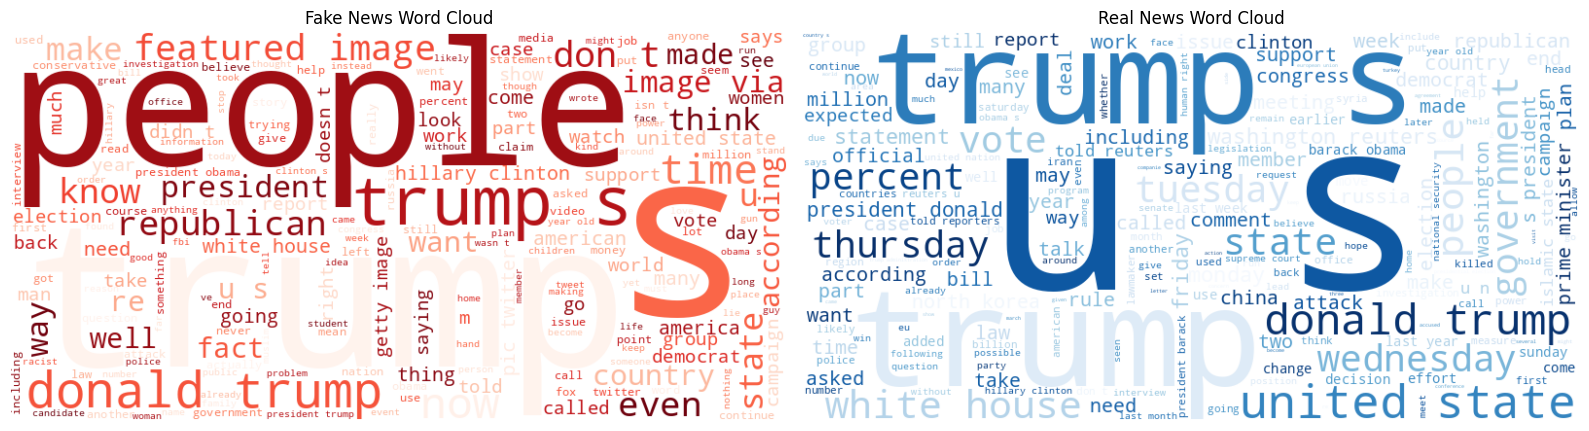

In [72]:

# Generate word clouds for Fake vs Real news
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

def text_for_label(label):
    texts = df.loc[df['label'] == label, 'text'].astype(str).str.cat(sep=' ')
    texts = re.sub(r'http\S+|www\S+|https\S+', '', texts)          # remove urls
    texts = re.sub(r'[^A-Za-z\s]', ' ', texts)                    # remove punctuation/numbers
    texts = re.sub(r'\s+', ' ', texts).strip()                    # normalize whitespace
    return texts.lower()

fake_text = text_for_label(0)
real_text = text_for_label(1)

stopwords = set(STOPWORDS)
stopwords.update(['said', 'will', 'one', 'new', 'news', 'say', 'also'])  # tweak as needed

wc_params = dict(width=800, height=400, background_color='white', stopwords=stopwords, max_words=200)

wc_fake = WordCloud(colormap='Reds', **wc_params).generate(fake_text)
wc_real = WordCloud(colormap='Blues', **wc_params).generate(real_text)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title('Real News Word Cloud')

plt.tight_layout()
plt.savefig('../images/word_clouds_fake_vs_real.png', bbox_inches='tight', dpi=300)
plt.show()

**summary**:
- The word trump has dominated both cases
- The words such as want day image, know now are more in the fake news 
- The specific and the factual words are more in the real news.

In [73]:
df.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject       date  \
0  Donald Trump just couldn t wish all Americans ...    News 2017-12-31   
1  House Intelligence Committee Chairman Devin Nu...    News 2017-12-31   
2  On Friday, it was revealed that former Milwauk...    News 2017-12-30   
3  On Christmas day, Donald Trump announced that ...    News 2017-12-29   
4  Pope Francis used his annual Christmas Day mes...    News 2017-12-25   

   label    year  month   day dayofweek  text_length  title_length  \
0      0  2017.0   12.0  31.0    Sunday         2893            79   
1      0  2017.0   12.0  31.0    Sunday         1898            69   
2      0  2017.0   12.0  30.0  Saturday         3597            90   
3      0  2017.0   12.0  29.0    Friday         2774            78   
4      0  2017.0   12.0  25.0    Monday         2346            70   

   punctuation_count  upper_case_count  
0                  9               138  
1                  0                88  
2                  4               308  
3                  1               123  
4                  0                63

In [74]:
df.to_csv('cleaned.csv', index=False)

In [75]:
# Save all currently open EDA plots to the images folder with descriptive names
import os

images_dir = os.path.join('..', 'images')
os.makedirs(images_dir, exist_ok=True)

fig_nums = plt.get_fignums()
print(f"Found {len(fig_nums)} open figures to save.")

# Descriptive names for each plot in order
plot_names = [
    'duplicate_texts_distribution',
    'class_balance_distribution',
    'news_categories_all',
    'news_categories_fake_only',
    'news_by_day_of_week',
    'text_length_distribution',
    'title_length_distribution',
    'punctuation_count_distribution',
    'uppercase_letter_distribution',
    'word_clouds_fake_vs_real'
]

for i, num in enumerate(fig_nums):
    fig = plt.figure(num)
    # Use descriptive name if available, otherwise fall back to numbered
    plot_name = plot_names[i] if i < len(plot_names) else f'eda_plot_{i+1}'
    file_path = os.path.join(images_dir, f'{plot_name}.png')
    fig.savefig(file_path, bbox_inches='tight', dpi=300)
    print(f"Saved: {plot_name}.png")

print(f"\nAll {len(fig_nums)} plots have been exported to the images folder.")


Found 0 open figures to save.

All 0 plots have been exported to the images folder.
